In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patheffects
%matplotlib widget

In [7]:
zimmerman_pinales_ave = pd.read_csv('data/zimmer_pinales_ftir_abs_ave.csv')
moldx_48 = pd.read_csv('../../mdi_optimization/cleaned_csvs/48_scans.csv').drop(columns=['wave_no'])
moldx_48['ave'] = moldx_48.iloc[:,:].mean(axis=1)

zimmerman_wave_no = pd.read_csv('data/zim_wave_no.csv')
moldx_wave_no = pd.read_csv('../../mdi_optimization/cleaned_csvs/wave_no.csv')

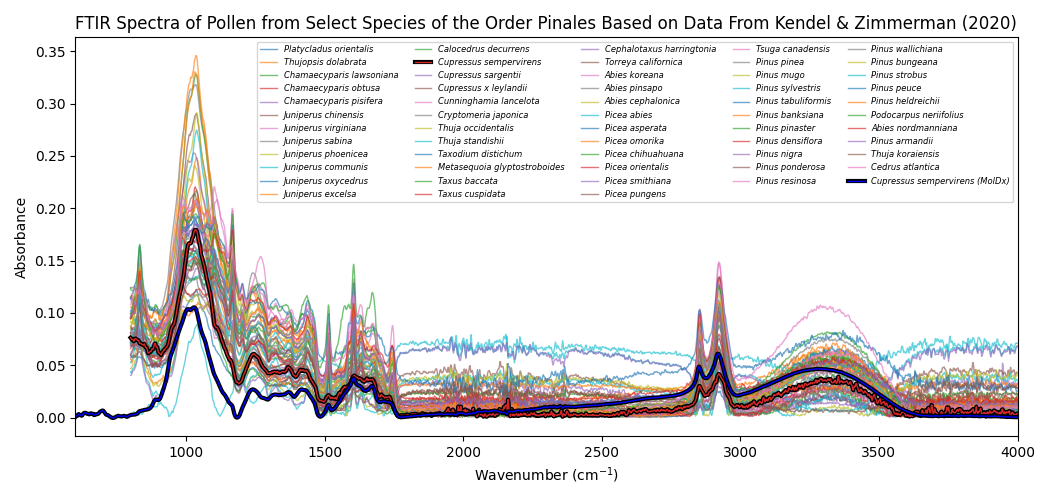

In [9]:
plt.close('all')
zimmerman_pinales_fig, axis = plt.subplots(1,1, figsize=(10.5,5))
zimmerman_pinales_fig.canvas.header_visible = False

pe = patheffects.withStroke(linewidth=3, foreground='black')

for species in zimmerman_pinales_ave.columns:
    if species == 'Cupressus sempervirens':
        axis.plot(zimmerman_wave_no, zimmerman_pinales_ave[species], linewidth=1, label=species, alpha=1, zorder=2)[0].set_path_effects([pe])
    else:
        axis.plot(zimmerman_wave_no, zimmerman_pinales_ave[species], linewidth=1, label=species, alpha=0.65, zorder=1)

axis.plot(moldx_wave_no, moldx_48['ave'], linewidth=1, label="Cupressus sempervirens (MolDx)", color='blue', alpha=1)[0].set_path_effects([pe])

axis.set(title='FTIR Spectra of Pollen from Select Species of the Order Pinales Based on Data From Kendel & Zimmerman (2020)',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Absorbance',
         xlim=(600,4000))
axis.legend(ncols=5, prop={'style': 'italic', 'size':6})
zimmerman_pinales_fig.tight_layout()
